In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import bands as separate 1 band raster
imagePath = '../Data/Sentinel_2/S2B_MSIL2A_20210901T141049_N0301_R110_T20KRA_20210901T165603.SAFE/GRANULE/L2A_T20KRA_A023445_20210901T141043/IMG_DATA/R10m/'
band2 = rasterio.open(imagePath+'T20KRA_20210901T141049_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T20KRA_20210901T141049_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T20KRA_20210901T141049_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T20KRA_20210901T141049_B08_10m.jp2', driver='JP2OpenJPEG') #nir

In [3]:
#number of raster bands
band4.count

1

In [4]:
#number of raster columns
band4.width

10980

In [5]:
#number of raster rows
band4.height

10980

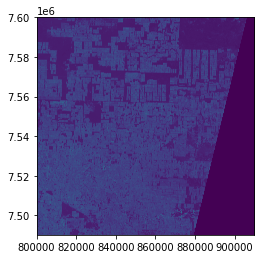

<AxesSubplot:>

In [6]:
#plot band 
plot.show(band4)

In [7]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [8]:
#raster transform parameters
band4.transform

Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 7600000.0)

In [9]:
#raster values as matrix array
band4.read(1)

array([[ 745,  766,  785, ...,    0,    0,    0],
       [ 776,  795,  785, ...,    0,    0,    0],
       [ 763,  767,  749, ...,    0,    0,    0],
       ...,
       [1050, 1230, 1368, ...,    0,    0,    0],
       [ 858, 1114, 1464, ...,    0,    0,    0],
       [ 855, 1460, 1710, ...,    0,    0,    0]], dtype=uint16)

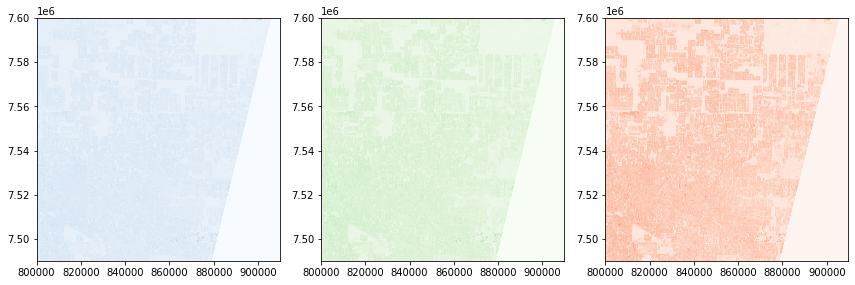

In [10]:
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

In [11]:
#export true color image
trueColor = rasterio.open('../Output/Sentinel2_Tutorial1/SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

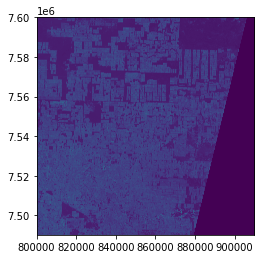

<AxesSubplot:>

In [12]:
src = rasterio.open(r"../Output/Sentinel2_Tutorial1/SentinelTrueColor2.tiff", count=3)
plot.show(src)

In [13]:
#export false color image
falseColor = rasterio.open('../Output/Sentinel2_Tutorial1/SentinelFalseColor.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()

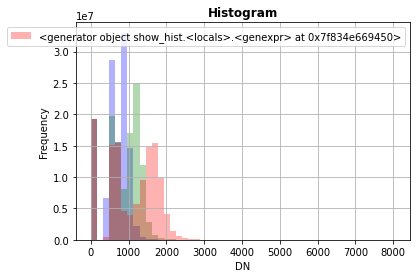

In [14]:
#generate histogram
trueColor = rasterio.open('../Output/Sentinel2_Tutorial1/SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")